# Neural Network training
Source: [Building a Neural Network & Making Predictions With Python AI](https://realpython.com/courses/build-neural-network-python-ai/)

In [23]:
import matplotlib.pyplot as plt
import numpy as np


In [59]:
class NeuralNetwork:
    """
    Neural network model.
    """

    def __init__(self, learning_rate: float):
        self.learning_rate = learning_rate
        self.bias = np.random.randn()
        self.weights = np.array([np.random.randn(), np.random.randn()])
        print(f"Neural network: weights={self.weights}, bias={self.bias}, learning_rate={self.learning_rate}")

    def _sigmoid(self, x: np.array) -> np.array:
        """
        Calculates the sigmoid activation function.
        :param x: Input
        :return: Output
        """
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x: np.array) -> np.array:
        """
        Sigmoid derivative function.
        :param x: Input
        :return: Sigmoid derivative value of the input
        """
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, x: np.array, debug: bool = False) -> np.array:
        """
        Predicts the output of the neural network.
        :param x: Input
        :param debug: Debug flag (False by default)
        :return: Prediction
        """
        prediction = self._sigmoid(np.dot(x, self.weights) + self.bias)
        if debug:
            print(f"Neural network: input={x}, prediction={prediction}")
        return prediction

    def error(self, prediction: np.array, target: np.array) -> np.array:
        """
        Calculates the error between prediction and target.
        :param prediction: Prediction
        :param target: Target
        :return: Error
        """
        return np.square(prediction - target)

    def _compute_gradients(self, input_vector: np.array, target: np.array, debug: bool = False) -> np.array:
        """
        Compute the weigths and bias gradients based on one input vector and its prediction.
        :param input_vector: Input vector.
        :param target: Target.
        :param debug: Debug flag (False by default)
        :return: Gradients as a tuple (weights gradient, bias gradient)
        """
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        # Calculate the gradients in a back-propagation direction

        # Derivative of the error with respect to the prediction
        derror_prediction = 2 * (prediction - target)

        # Derivative of layer 2 with respect to layer 1's output
        dprediction_layer1 = self._sigmoid_derivative(layer_1)

        # Derivative of layer 1 with respect to the weights
        dlayer1_weights = (0 * self.weights) + (1 * input_vector)

        # Derivative of layer 1 with respect to the bias
        dlayer1_bias = 1

        # Gradients
        weights_gradient = derror_prediction * dprediction_layer1 * dlayer1_weights
        bias_gradient = derror_prediction * dprediction_layer1 * dlayer1_bias

        if debug:
            print(f"Gradients: weights={weights_gradient}, bias={bias_gradient}")

        return weights_gradient, bias_gradient

    def _update_parameters(self, weights_gradient: np.array, bias_gradient: np.array) -> None:
        """
        Update the network's parameters using gradient descent.
        :param weights_gradient: Weights gradient vector
        :param bias_gradient: Bias gradient vector
        :return: None.
        """
        self.weights = self.weights - (self.learning_rate * weights_gradient)
        self.bias = self.bias - (self.learning_rate * bias_gradient)

    def train(self, input_vectors: np.array, targets: np.array, iterations: int) -> list[float]:
        """
        Train the neural network.
        :param input_vectors: Input vectors to train on.
        :param targets: Train input vectors' labels.
        :param iterations: Number of iterations.
        :return: List of cumulative errors.
        """
        cumulative_errors = []
        for i in range(iterations):
            # Pick a random training sample
            random_train_index = np.random.randint(len(input_vectors))
            train_input_vector = input_vectors[random_train_index]
            train_target = targets[random_train_index]

            # Compute the gradients
            weights_gradient, bias_gradient = self._compute_gradients(train_input_vector, train_target)

            # Update the model's parameters
            self._update_parameters(weights_gradient, bias_gradient)

            # For every 100 iterations, compute the cumulative error over all train data
            if i % 100 == 0:
                cumulative_error = 0
                for train_index in range(len(input_vectors)):
                    input_vector = input_vectors[train_index]
                    target_vector = targets[train_index]
                    prediction = self.predict(input_vector)
                    error = self.error(prediction, target_vector)
                    cumulative_error += error
                cumulative_errors.append(cumulative_error)
                print(f"[{i}] Cumulative error: {cumulative_error}")

        return cumulative_errors

In [65]:
nn = NeuralNetwork(learning_rate=0.1)

test_input_vector_1 = np.array([1.66, 1.56])
test_target = np.array([1])
test_prediction = nn.predict(test_input_vector_1)
test_error = nn.error(test_prediction, test_target)
print(f"input={test_input_vector_1}, target={test_target}, prediction={test_prediction}, error={test_error}")

Neural network: weights=[-0.42245586 -0.0063062 ], bias=-0.27190022640171585, learning_rate=0.1
input=[1.66 1.56], target=[1], prediction=0.27229402595148644, error=[0.52955598]


In [66]:
train_input_vectors = np.array([[3, 1.5], [2, 1], [4, 1.5], [3, 4], [3.5, 0.5], [2, 0.5], [5.5, 1], [1, 1]])
train_targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])
train_learning_rate = 0.1

neural_network = NeuralNetwork(train_learning_rate)

Neural network: weights=[-0.01944083  1.80369437], bias=0.5818580368901102, learning_rate=0.1


In [67]:
train_errors = neural_network.train(train_input_vectors, train_targets, 10000)

[0] Cumulative error: 3.397527529647743
[100] Cumulative error: 2.35225543626439
[200] Cumulative error: 2.201880878653079
[300] Cumulative error: 2.112507952742296
[400] Cumulative error: 2.029876603271165
[500] Cumulative error: 2.0141015639333633
[600] Cumulative error: 1.9744119872762602
[700] Cumulative error: 1.9102944399499924
[800] Cumulative error: 2.0402407142096504
[900] Cumulative error: 2.2247153625911955
[1000] Cumulative error: 1.9321147836197106
[1100] Cumulative error: 1.9252603395640195
[1200] Cumulative error: 1.9657199349406649
[1300] Cumulative error: 1.944331351623678
[1400] Cumulative error: 2.0440574597653987
[1500] Cumulative error: 1.9482285769077896
[1600] Cumulative error: 1.9159096182173876
[1700] Cumulative error: 2.3203042893101227
[1800] Cumulative error: 1.9712985165491168
[1900] Cumulative error: 2.0208016507311455
[2000] Cumulative error: 2.065678535738389
[2100] Cumulative error: 2.0141619291071233
[2200] Cumulative error: 2.4754767906847612
[2300] C

In [68]:
train_errors[:10]

[3.397527529647743,
 2.35225543626439,
 2.201880878653079,
 2.112507952742296,
 2.029876603271165,
 2.0141015639333633,
 1.9744119872762602,
 1.9102944399499924,
 2.0402407142096504,
 2.2247153625911955]

Text(0, 0.5, 'Error for all training instances')

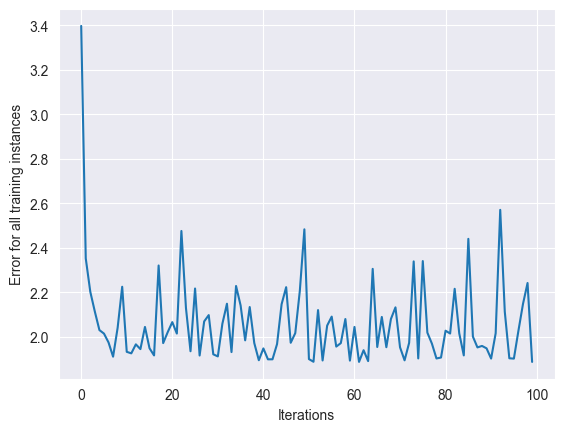

In [69]:
plt.plot(train_errors)
plt.xlabel('Iterations')
plt.ylabel('Error for all training instances')